# Predicting Parkinson's Disease Using Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Importing the data and learning about it:

In [2]:
df = pd.read_csv('parkinsons.data')

In [4]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [15]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


1    147
0     48
Name: status, dtype: int64

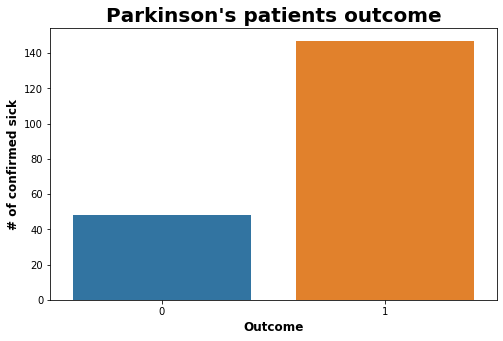

In [8]:
plt.figure(figsize=(8,5))
sns.countplot(x = df['status'], data=df)
plt.title('Parkinson\'s patients outcome', fontsize=20, fontweight="bold")
plt.ylabel('# of confirmed sick', fontsize=12, fontweight="bold")
plt.xlabel('Outcome', fontsize=12, fontweight="bold")
df['status'].value_counts()

In [5]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [6]:
df.duplicated().sum()

0

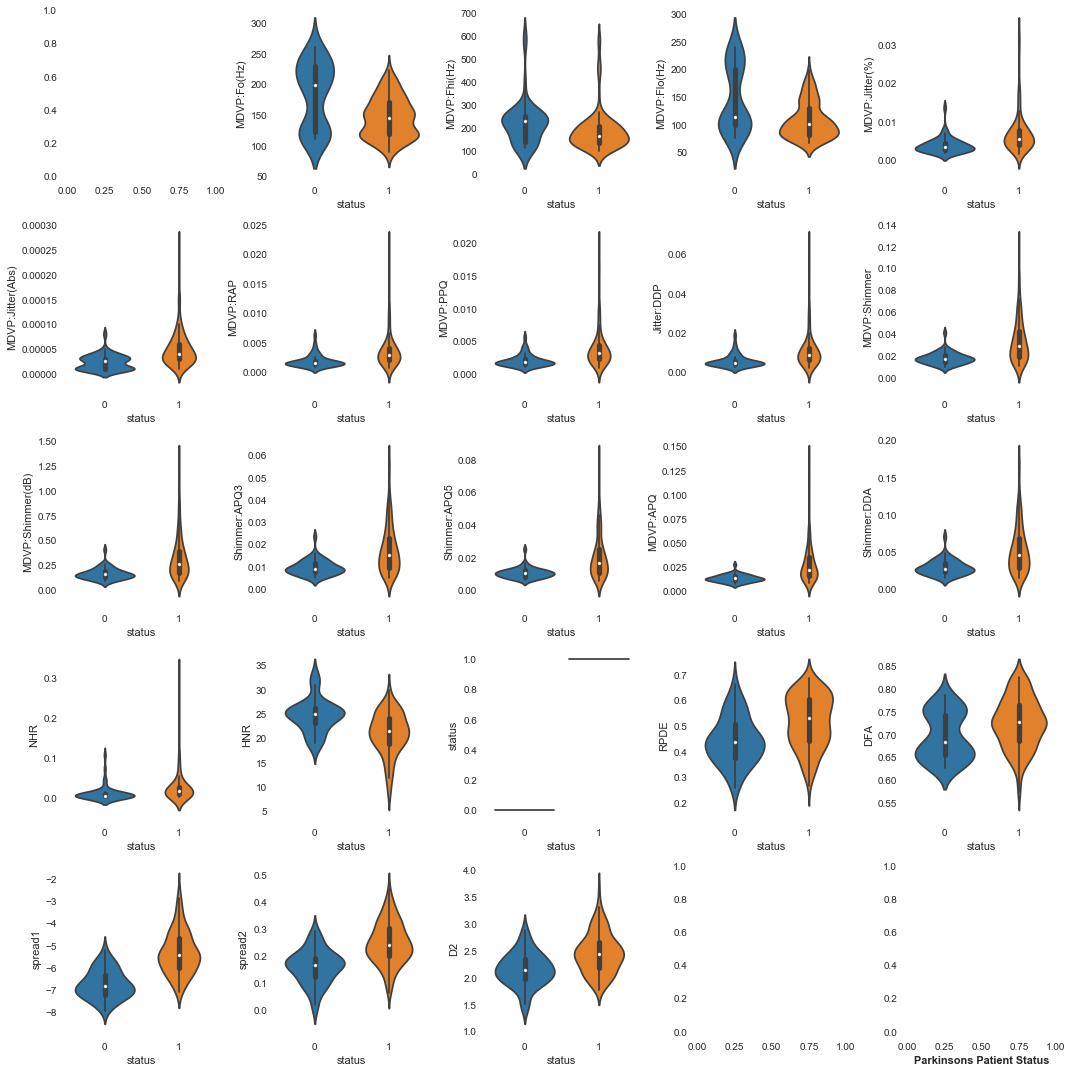

In [59]:
fig,axes=plt.subplots(5,5,figsize=(15,15))
axes=axes.flatten()

for i in range(1,len(df.columns)-1):
    sns.violinplot(x='status',y=df.iloc[:,i],data=df,orient='v',ax=axes[i])
plt.xlabel("Parkinsons Patient Status", fontweight="bold")
plt.tight_layout()
plt.show()

## Splitting the data:

In [133]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import metrics

x = df.drop(['status', 'name'], axis = 1)
y = df['status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# ML Models:

### KNN:

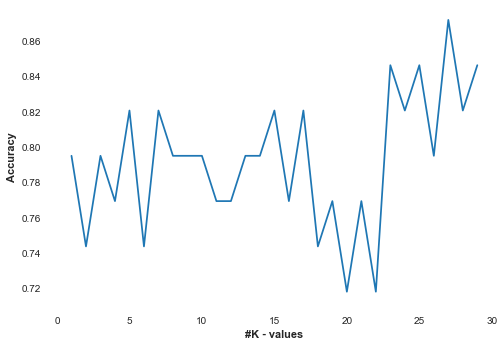

In [135]:
from sklearn.neighbors import KNeighborsClassifier

score_list=[]
for i in range(1,30):
    knnPlot=KNeighborsClassifier(n_neighbors=i)
    knnPlot.fit(x_train,y_train)
    score_list.append(knnPlot.score(x_test,y_test))

plt.plot(range(1,30),score_list)
plt.xlabel('#K - values', fontweight="bold")
plt.ylabel('Accuracy', fontweight="bold")
plt.show()

In [139]:
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
knn_f1 = metrics.f1_score(y_test, y_pred_knn, average= "weighted")
knn_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
knn_cm = metrics.confusion_matrix(y_test, y_pred_knn)
print("-----------------K-nearest neighbors Report---------------")
print("F1 score: {}".format(knn_f1))
print("Accuracy score: {}".format(knn_accuracy))
print("Confusion matrix: \n", knn_cm)
print(metrics.classification_report(y_test, y_pred_knn))
kf = KFold(n_splits=5,shuffle=True, random_state=123)
cv_scores = cross_val_score(knn,x_test,y_test,cv=kf)
print("Cross Validation Scores:", cv_scores)
print("Cross Validation Scores Mean:", cv_scores.mean(),"\n")

-----------------K-nearest neighbors Report---------------
F1 score: 0.8408274495231017
Accuracy score: 0.8717948717948718
Confusion matrix: 
 [[ 2  5]
 [ 0 32]]
              precision    recall  f1-score   support

           0       1.00      0.29      0.44         7
           1       0.86      1.00      0.93        32

    accuracy                           0.87        39
   macro avg       0.93      0.64      0.69        39
weighted avg       0.89      0.87      0.84        39

Cross Validation Scores: [0.625      0.75       1.         0.875      0.85714286]
Cross Validation Scores Mean: 0.8214285714285714 



### Random Forest:

In [140]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators = 100, random_state = 123, max_depth=2)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
rf_f1 = metrics.f1_score(y_test, y_pred_rf, average= "weighted")
rf_accuracy = metrics.accuracy_score(y_test, y_pred_rf)
rf_cm = metrics.confusion_matrix(y_test, y_pred_rf)
print("--------------------Random Forest------------------")
print("F1 score: {}".format(rf_f1))
print("Accuracy score: {}".format(rf_accuracy))
print("Confusion matrix: \n", rf_cm)
print(metrics.classification_report(y_test, y_pred_rf))
kf = KFold(n_splits=5,shuffle=True, random_state=123)
cv_scores = cross_val_score(rf,x_test,y_test,cv=kf)
print("Cross Validation Scores:", cv_scores)
print("Cross Validation Scores Mean:", cv_scores.mean(),"\n")

--------------------Random Forest------------------
F1 score: 0.8799396681749624
Accuracy score: 0.8974358974358975
Confusion matrix: 
 [[ 3  4]
 [ 0 32]]
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39

Cross Validation Scores: [0.75  0.75  1.    0.875 1.   ]
Cross Validation Scores Mean: 0.875 



### XGBoost:

In [141]:
from xgboost import XGBClassifier

model=XGBClassifier()
model.fit(x_train,y_train)
y_pred_model = model.predict(x_test)
model_f1 = metrics.f1_score(y_test, y_pred_model, average= "weighted")
model_accuracy = metrics.accuracy_score(y_test, y_pred_model)
model_cm = metrics.confusion_matrix(y_test, y_pred_model)
print("--------------------XGBoost------------------")
print("F1 score: {}".format(model_f1))
print("Accuracy score: {}".format(model_accuracy))
print("Confusion matrix: \n", model_cm)
print(metrics.classification_report(y_test, y_pred_model))

--------------------XGBoost------------------
F1 score: 0.9452214452214454
Accuracy score: 0.9487179487179487
Confusion matrix: 
 [[ 5  2]
 [ 0 32]]
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



In [151]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(df.loc[:,df.columns!='status'].values[:,1:])
y=df.loc[:,'status'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=7)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9795918367346939
